### Part IV: Elastic Net Regression using Gradient Descent [30 points]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List

In [2]:
diamond_df = diamond_df = pd.read_csv('Data/noisy_datasets/diamond.csv', skipinitialspace=True, na_values=['FALSE', 'TRUE', 'MAYBE','IF','if'])
diamond_df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
print(diamond_df.head())

   carat      cut color clarity  average us salary  \
0   0.23    Ideal     E     SI2              31282   
1   0.21  Premium     E     SI1              40049   
2   0.23     Good     E     VS1              33517   
3   0.29  Premium     I     VS2              38495   
4   0.31     Good     J     SI2              34178   

   number of diamonds mined (millions)  depth  table  price     x     y     z  
0                                 5.01   61.5   55.0  326.0  3.95  3.98  2.43  
1                                 1.69   59.8   61.0  326.0  3.89  3.84  2.31  
2                                 3.85   56.9   65.0  327.0  4.05  4.07  2.31  
3                                 3.49   62.4   58.0  334.0  4.20  4.23  2.63  
4                                 4.70   63.3   58.0  335.0  4.34  4.35  2.75  


In [4]:
diamond_df.describe()

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,51073.000000,53940.000000,53940.000000,51866.000000,51030.000000,51844.000000,51027.000000,52208.000000,51532.000000
mean,0.797823,39521.990100,2.902669,61.750175,57.456332,3933.022047,5.731451,5.734517,3.538203
std,0.473747,5486.892971,1.325985,1.433485,2.231611,3989.013631,1.121433,1.142543,0.706057
min,0.200000,30000.000000,0.600000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,34780.000000,1.750000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,39547.500000,2.910000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,44252.000000,4.050000,62.500000,59.000000,5327.250000,6.540000,6.540000,4.030000
max,5.010000,48999.000000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
print("Shape of the dataset is: ", diamond_df.shape)

Shape of the dataset is:  (53940, 12)


In [6]:
diamond_df.isna().sum() #checking for empty columns

carat                                  2867
cut                                    2682
color                                  2890
clarity                                3472
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [7]:
diamond_df['cut']=diamond_df['cut'].fillna(diamond_df['cut'].mode()[0])
diamond_df['color']=diamond_df['color'].fillna(diamond_df['color'].mode()[0])
diamond_df['clarity']=diamond_df['clarity'].fillna(diamond_df['clarity'].mode()[0])
diamond_df['carat']=diamond_df['carat'].fillna(diamond_df['carat'].median())
diamond_df['depth']=diamond_df['depth'].fillna(diamond_df['depth'].median())
diamond_df['table']=diamond_df['table'].fillna(diamond_df['table'].median())
diamond_df['price']=diamond_df['price'].fillna(diamond_df['price'].median())
diamond_df['x']=diamond_df['x'].fillna(diamond_df['x'].median())
diamond_df['y']=diamond_df['y'].fillna(diamond_df['y'].median())
diamond_df['z']=diamond_df['z'].fillna(diamond_df['z'].median())
diamond_df.isna().sum()

carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64

In [8]:
def upperCase(value):
    return value.upper()
def lowerCase(value):
    return value.lower()
diamond_df['cut']=diamond_df['cut'].apply(lowerCase)
diamond_df['color']=diamond_df['color'].apply(upperCase)
diamond_df['clarity']=diamond_df['clarity'].apply(upperCase)
diamond_df

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,good,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,good,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,very good,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,premium,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [10]:
#Identifying and removing the outliers in the dataset
columns=['carat','average us salary','number of diamonds mined (millions)','depth','x','y','z']
def impute_outlier(diamond_df, column):
    impute_column = diamond_df[column]
    q1 = diamond_df[column].quantile(0.25)
    q3 = diamond_df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    non_outlier_median = impute_column[(diamond_df[column] >= lower_bound) & (diamond_df[column] <= upper_bound)].median()

    def impute_value(value):
        if value < lower_bound or value > upper_bound:
            return non_outlier_median
        else:
            return value

    diamond_df[column] = diamond_df[column].apply(impute_value)

for column in columns:
    impute_outlier(diamond_df, column)

diamond_df

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,good,E,VS1,33517,3.85,61.8,65.0,327.0,4.05,4.07,2.31
3,0.29,premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,good,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,very good,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,premium,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [12]:
#converting categorical data to numerical data
diamond_df['cut']=pd.Categorical(diamond_df['cut']).codes
diamond_df['color']=pd.Categorical(diamond_df['color']).codes
diamond_df['clarity']=pd.Categorical(diamond_df['clarity']).codes
diamond_df.corr() #printing the correlation matrix to find the impact of various parameters on the target variable

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
carat,1.000000,0.024632,0.211465,-0.186169,0.003891,-0.003927,0.030601,0.161728,0.704581,0.844921,0.844802,0.845626
cut,0.024632,1.000000,-0.005366,0.028043,0.001916,0.001913,-0.072371,0.150839,0.042656,0.022081,0.028400,0.002304
color,0.211465,-0.005366,1.000000,-0.026672,-0.003647,-0.004855,0.034518,0.024448,0.165009,0.261819,0.261676,0.264009
clarity,-0.186169,0.028043,-0.026672,1.000000,-0.001962,0.002471,-0.049540,-0.089044,-0.070300,-0.230058,-0.228355,-0.232558
average us salary,0.003891,0.001916,-0.003647,-0.001962,1.000000,0.001257,0.002146,-0.000869,0.005170,0.003990,0.005448,0.004467
number of diamonds mined (millions),-0.003927,0.001913,-0.004855,0.002471,0.001257,1.000000,0.001463,-0.002180,-0.011318,-0.009220,-0.008896,-0.010068
depth,0.030601,-0.072371,0.034518,-0.049540,0.002146,0.001463,1.000000,-0.178637,0.001521,-0.005633,-0.006661,0.069689
table,0.161728,0.150839,0.024448,-0.089044,-0.000869,-0.002180,-0.178637,1.000000,0.124689,0.190154,0.183026,0.151148
price,0.704581,0.042656,0.165009,-0.070300,0.005170,-0.011318,0.001521,0.124689,1.000000,0.859550,0.862742,0.855815
x,0.844921,0.022081,0.261819,-0.230058,0.003990,-0.009220,-0.005633,0.190154,0.859550,1.000000,0.972048,0.963921


In [14]:
#based on the correlation matrix, we selected feature columns which cause the most impact on the target value 'price'
feature_columns = ['carat', 'x', 'y', 'z']
X = diamond_df[feature_columns]  #Feature values
Y = diamond_df[['price']]  #Target variable

In [15]:
print('Shape of X', X.shape) #X is in the shape of 𝑁 x 𝑑 where 𝑁 is number of data samples and 𝑑 is number of features.

Shape of X (53940, 4)


In [16]:
print('Shape of Y', Y.shape) #Y is in the shape of 𝑁 x 1 where 𝑁 is number of data samples.

Shape of Y (53940, 1)


In [17]:
data_shuffled = pd.concat([X, Y], axis=1).sample(frac=1, random_state=42).reset_index(drop=True)
#shuffles the dataset and randomizes the order of rows to avoid ordering bias during training, making model more robust

#Splitting the dataset into training and testing in the ratio of 80:20
split_index = int(0.8 * len(data_shuffled))
train_data = data_shuffled[:split_index]
test_data = data_shuffled[split_index:]

In [18]:
#Separating the features(X) and target(Y) for both the training and testing sets
X_train = train_data[feature_columns]  #selecting feature columns from training set to get X_train
Y_train = train_data[['price']]     #selecting the 'price' column for Y_train
X_test = test_data[feature_columns]    #selecting feature columns from testing set to get X_test
Y_test = test_data[['price']]        #selecting the 'price' column for Y_test

In [19]:
#Printing the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")  
print(f"Shape of Y_train: {Y_train.shape}") 
print(f"Shape of X_test: {X_test.shape}")   
print(f"Shape of Y_test: {Y_test.shape}")    

Shape of X_train: (43152, 4)
Shape of Y_train: (43152, 1)
Shape of X_test: (10788, 4)
Shape of Y_test: (10788, 1)


In [20]:
#converting target vector into 1D array
Y_train = Y_train.values.flatten()
Y_test = Y_test.values.flatten()

In [21]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (43152, 4)
Y_train shape: (43152,)
X_test shape: (10788, 4)
Y_test shape: (10788,)


In [22]:
#normalizing the feature and target variable values using min max normalization
def min_max_normalize(train_data, test_data):
    min_val = np.min(train_data, axis=0) #min and max values are taken from the training data
    max_val = np.max(train_data, axis=0)
    #Normalizing training and testing data
    normalized_training_data = (train_data - min_val) / (max_val - min_val)
    normalized_testing_data = (test_data - min_val) / (max_val - min_val)  #Using training set's min and max to normalize test data
    return normalized_training_data, normalized_testing_data

In [24]:
#Normalizing the X and Y values
X_train, X_test = min_max_normalize(X_train, X_test)
Y_train, Y_test = min_max_normalize(Y_train, Y_test)
print("Normalized X_train:\n", X_train)
print("Normalized y_train:\n", Y_train)

Normalized X_train:
           carat         x         y         z
0      0.023256  0.044610  0.053407  0.251781
1      0.220930  0.317844  0.314917  0.439430
2      0.116279  0.191450  0.189687  0.365796
3      0.133721  0.221190  0.217311  0.372922
4      0.784884  0.689591  0.674033  0.760095
...         ...       ...       ...       ...
43147  0.470930  0.500000  0.506446  0.612827
43148  0.203488  0.291822  0.283610  0.441805
43149  0.122093  0.182156  0.189687  0.380048
43150  0.517442  0.537175  0.550645  0.627078
43151  0.058140  0.096654  0.108656  0.301663

[43152 rows x 4 columns]
Normalized y_train:
 [0.01259664 0.10136779 0.04930529 ... 0.04557496 0.43455696 0.01081256]


In [25]:
X = X_train
Y = Y_train

In [26]:
print("Type of X:", type(X), "Shape of X:", X.shape)
print("Type of y:", type(Y), "Shape of y:", Y.shape)

Type of X: <class 'pandas.core.frame.DataFrame'> Shape of X: (43152, 4)
Type of y: <class 'numpy.ndarray'> Shape of y: (43152,)


In [27]:
#defining a class for elastic net regression, it has various functions like elastic net loss, gradient, xavier initialization, fit etc
class elastic_net_regression:
    #constructor to initialize all values
    def __init__(self, lambda1=0.01, lambda2=0.01, learning_rate=0.01, num_iterations=1000, init_method='zeros'):
        self.lambda1 = lambda1  #L2 regularization parameter (Ridge) penalty
        self.lambda2 = lambda2  #L1 regularization parameter (Lasso) penalty
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations #initialized as 1000
        self.weights = None
        self.bias = None
        self.losses = []
        self.init_method = init_method

    #elastic net loss function to calculate (MSE + L1 + L2 penalties)
    def elastic_net_loss(self, y_true, y_hat, w):
        mse = np.mean((y_true - y_hat)**2)
        l2_penalty = (self.lambda1/2) * np.sum(w**2)
        l1_penalty = self.lambda2 * np.sum(np.abs(w))
        return mse + l2_penalty + l1_penalty

    #computing the gradient for the elastic net loss function
    #the equation is  -(1/N) * Σ(x_i * (y_i - w^T * x_i)) + λ1 * w + λ2 * sign(w) which is found by calculating the 
    #derivative of the elastic net loss function with respect to w
    def gradient(self, X, y_true, y_hat, w):
        N = len(y_true) #number of rows (values)
        grad_mse = - (2 / N) * X.T.dot(y_true - y_hat) #derviative of mse
        grad_l2 = self.lambda1 * w #derivative of l2 penalty
        grad_l1 = self.lambda2 * np.sign(w) #derivative of l1 penalty
        return grad_mse + grad_l2 + grad_l1

    #xavier initialization technique, based on the given formula
    def xavier_initialization(self, input_dim, output_dim):
        limit = np.sqrt(6 / (input_dim + output_dim))
        return np.random.uniform(-limit, limit, size=(input_dim, output_dim))

    #function to initialize weights based on different types
    def initialize_weights(self, n_features):
        if self.init_method == 'zeros':
            self.weights = np.zeros(n_features)
        elif self.init_method == 'random':
            self.weights = np.random.randn(n_features)
        elif self.init_method == 'xavier':
            self.weights = self.xavier_initialization(n_features, 1).flatten()
        self.bias = 0.0

    #function to fit the elastic net model using gradient descent 
    def fit(self, X, y):
        m, n = X.shape
        self.initialize_weights(n)
        for i in range(self.num_iterations):
            y_hat = X.dot(self.weights) + self.bias #using y=mx + cw
            loss = self.elastic_net_loss(y, y_hat, self.weights) #calculating the value of loss
            self.losses.append(loss)
            #calculating the value of the gradient
            dw = self.gradient(X, y, y_hat, self.weights)
            db = (2 / m) * np.sum(y_hat - y)
            #Updating values of weights and bias on the basis of the output
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            if i % 100 == 0:  #printing the value of loss after every 100 iterations
                print(f"Iteration {i}: Loss = {loss}")

    #predict function used to predict the output value
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

#function to calculate the value of r square
def r_square(y_true, y_hat):
    res = np.sum((y_true - y_hat) ** 2)  #residual sum of squares
    tot = np.sum((y_true - np.mean(y_true)) ** 2)  #total sum of squares
    r2 = 1 - (res / tot)
    return r2

#function to train and evaluate the model
def train_and_evaluate(learning_rate, iterations, lambda1, lambda2, init_method):
    model = elastic_net_regression(lambda1, lambda2, learning_rate, iterations, init_method)
    model.fit(X_train, Y_train)
    y_hat = model.predict(X_test)
    mse = np.mean((Y_test - y_hat) ** 2) #using MSE and R square to evaluate the model
    r2 = r_square(Y_test, y_hat)
    print(f"MSE: {mse:.4f}, R-squared: {r2:.4f} for learning rate {learning_rate}, iterations {iterations}, initialization {init_method}")
    return mse, r2, model

best_mse = float('inf')
best_model = None

hyperparameters = [ 
    (0.05, 1000, 0.01, 0.01, 'zeros'),
    (0.5, 5000, 0.001, 0.001, 'random'),
    (0.1, 10000, 0.005, 0.005, 'xavier')
] #testing the model using various values of hyperparameters for different initilization methods
for alpha, iter, lambda1, lambda2, init_method in hyperparameters:
    mse, r2, model = train_and_evaluate(alpha, iter, lambda1, lambda2, init_method)
    if mse < best_mse:
        best_mse = mse
        best_model = model


Iteration 0: Loss = 0.08182367957471572
Iteration 100: Loss = 0.024126899614306183
Iteration 200: Loss = 0.022247283883920888
Iteration 300: Loss = 0.0218076524145549
Iteration 400: Loss = 0.02163090130357395
Iteration 500: Loss = 0.021521737361357242
Iteration 600: Loss = 0.02144282382395484
Iteration 700: Loss = 0.021383462391064017
Iteration 800: Loss = 0.021338358277599084
Iteration 900: Loss = 0.021303958783888962
MSE: 0.0122, R-squared: 0.7282 for learning rate 0.05, iterations 1000, initialization zeros
Iteration 0: Loss = 0.05163662993061948
Iteration 100: Loss = 0.018623050777323107
Iteration 200: Loss = 0.01424132711246524
Iteration 300: Loss = 0.01317657925263826
Iteration 400: Loss = 0.012590159384603564
Iteration 500: Loss = 0.01244941692802737
Iteration 600: Loss = 0.012373082036432342
Iteration 700: Loss = 0.012318257488025407
Iteration 800: Loss = 0.012278700993866128
Iteration 900: Loss = 0.0122501335485564
Iteration 1000: Loss = 0.012229497461601934
Iteration 1100: Lo

Iteration 0: Loss = 0.08182367957471572
Iteration 100: Loss = 0.02224035493282963
Iteration 200: Loss = 0.02163024947401773
Iteration 300: Loss = 0.021442534411826412
Iteration 400: Loss = 0.021338159258669442
Iteration 500: Loss = 0.021277520011815362
Iteration 600: Loss = 0.02124188690625171
Iteration 700: Loss = 0.021220680124608857
Iteration 800: Loss = 0.02120785635064436
Iteration 900: Loss = 0.02120217748866572
Initialization: zeros, MSE: 0.0119, R-squared: 0.7334
Iteration 0: Loss = 0.08026168123679561
Iteration 100: Loss = 0.04981425220410679
Iteration 200: Loss = 0.03979453591663348
Iteration 300: Loss = 0.03235567223968133
Iteration 400: Loss = 0.02662257426176469
Iteration 500: Loss = 0.022436694942655405
Iteration 600: Loss = 0.02212293406630008
Iteration 700: Loss = 0.0219188769140804
Iteration 800: Loss = 0.021761263689591435
Iteration 900: Loss = 0.02163813080737209
Initialization: random, MSE: 0.0120, R-squared: 0.7311
Iteration 0: Loss = 0.09270782571487464
Iteration 

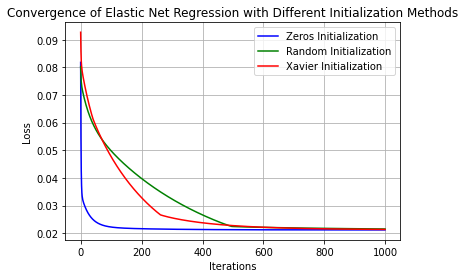

In [28]:
#Experimenting with different weight initialization methods
def weight_initialization_test(hyperparameters, X_train, Y_train, X_test, Y_test):
    results = []
    for alpha, iters, lambda1, lambda2, init_method, color in hyperparameters:
        model = elastic_net_regression(lambda1, lambda2, alpha, iters, init_method)
        model.fit(X_train, Y_train)
        y_hat = model.predict(X_test)
        mse = np.mean((Y_test - y_hat) ** 2)
        r2 = r_square(Y_test, y_hat)
        #storing the results for analysis
        results.append({
            'init_method': init_method,
            'learning_rate': alpha,
            'iterations': iters,
            'lambda1': lambda1,
            'lambda2': lambda2,
            'mse': mse,
            'r2': r2,
            'losses': model.losses
        })
        print(f"Initialization: {init_method}, MSE: {mse:.4f}, R-squared: {r2:.4f}")
        
        #plotting the convergence graph for each initialization method
        plt.plot(range(len(model.losses)), model.losses, label=f'{init_method.capitalize()} Initialization', color=color)

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Convergence of Elastic Net Regression with Different Initialization Methods')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

#Testing different weight initialization methods with the same hyperparameters
hyperparameters = [
    (0.1, 1000, 0.01, 0.01, 'zeros', 'blue'),
    (0.1, 1000, 0.01, 0.01, 'random', 'green'),
    (0.1, 1000, 0.01, 0.01, 'xavier', 'red')
]

result = weight_initialization_test(hyperparameters, X_train, Y_train, X_test, Y_test)


Iteration 0: Loss = 0.08182367957471572
Iteration 100: Loss = 0.02224035493282963
Iteration 200: Loss = 0.02163024947401773
Iteration 300: Loss = 0.021442534411826412
Iteration 400: Loss = 0.021338159258669442
Iteration 500: Loss = 0.021277520011815362
Iteration 600: Loss = 0.02124188690625171
Iteration 700: Loss = 0.021220680124608857
Iteration 800: Loss = 0.02120785635064436
Iteration 900: Loss = 0.02120217748866572
Max Iterations MSE: 0.0119
Stopping at iteration 74 due to gradient threshold.
Gradient Threshold MSE: 0.0157


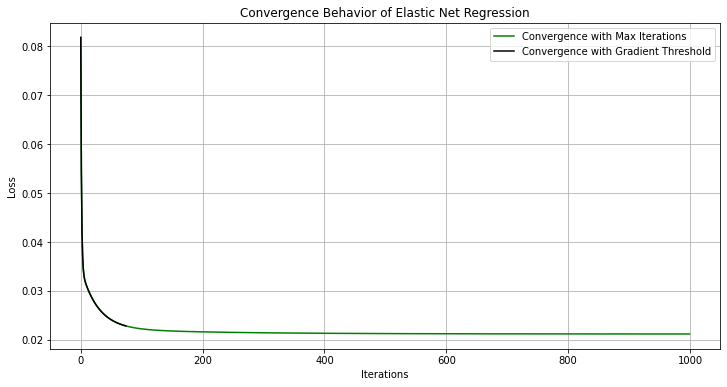

In [29]:
def stopping_criteria_test(hyperparameters, X_train, Y_train, X_test, Y_test):
    results = []
    for alpha, iters, lambda1, lambda2, init_method in hyperparameters:
        model = elastic_net_regression(lambda1, lambda2, alpha, iters, init_method)
        model.fit(X_train, Y_train) #running the model with maximum iterations
        y_hat_max_iter = model.predict(X_test)
        mse_max_iter = np.mean((Y_test - y_hat_max_iter) ** 2)
        results.append({'method': 'Max Iterations', 'mse': mse_max_iter, 'losses': model.losses})
        print(f'Max Iterations MSE: {mse_max_iter:.4f}')
        losses_max_iter = model.losses.copy()
        #resetting the model
        model.losses = []
        #running the model with gradient threshold
        m, n = X_train.shape
        model.initialize_weights(n)
        threshold = 0.01 #initializing value of threshold
        for i in range(iters):
            y_hat = X_train.dot(model.weights) + model.bias
            loss = model.elastic_net_loss(Y_train, y_hat, model.weights) #calculating loss
            model.losses.append(loss)
            dw = model.gradient(X_train, Y_train, y_hat, model.weights) #calculating gradients
            db = (2 / m) * np.sum(y_hat - Y_train)
            #checking the threshold value
            if np.all(np.abs(dw) < threshold):
                print(f'Stopping at iteration {i} due to gradient threshold.')
                break
            model.weights -= model.learning_rate * dw
            model.bias -= model.learning_rate * db

        y_hat_threshold = model.predict(X_test)
        mse_threshold = np.mean((Y_test - y_hat_threshold) ** 2)
        results.append({'method': 'Gradient Threshold', 'mse': mse_threshold, 'losses': model.losses})
        print(f'Gradient Threshold MSE: {mse_threshold:.4f}')
        losses_threshold = model.losses.copy()

        #plotting the convergence behaviour
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(losses_max_iter)), losses_max_iter, label='Convergence with Max Iterations', color='green')
        plt.plot(range(len(losses_threshold)), losses_threshold, label='Convergence with Gradient Threshold', color='black')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Convergence Behavior of Elastic Net Regression')
        plt.legend()
        plt.grid(True)
        plt.show()

    return results

hyperparameters = [
    (0.1, 1000, 0.01, 0.01, 'zeros'),
]
result = stopping_criteria_test(hyperparameters, X_train, Y_train, X_test, Y_test)

